In [1]:
import pandas as pd
import time
import pyodbc
import db_config
from matplotlib import pyplot as plt
import numpy as np
from sqlalchemy import create_engine
import urllib

In [ ]:
##Connecting to database
# --- Configuration ---
server = db_config.DB_SERVER   # SQL Server name or IP
database = db_config.DB_NAME   # target database
username = db_config.DB_USER
password = db_config.DB_PASSWORD
table_name = db_config.DB_TABLE_NAME


#conn_str_master = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
#conn = pyodbc.connect(conn_str_master, autocommit=True)

connection_string = (
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"UID={username};"
    f"PWD={password};"
    f"Encrypt=no;"
)

# URL encode the ODBC string
params = urllib.parse.quote_plus(connection_string)

engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")


def runDbQuery(query):
    result = pd.read_sql(query, engine)
    return result

#print(runDbQuery(f"SELECT * FROM {table_name}"))



In [ ]:
#Analysis 1: Number of card avalible in each city:
analysis_1 = runDbQuery(f"SELECT City, COUNT(City) AS Cars_per_city FROM {table_name} GROUP BY City;")

analysis_1_x = analysis_1['City']
analysis_1_y = analysis_1['Cars_per_city']
plt.bar(analysis_1_x, analysis_1_y)
plt.title('Number of Cars in Each City')
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)
plt.show()

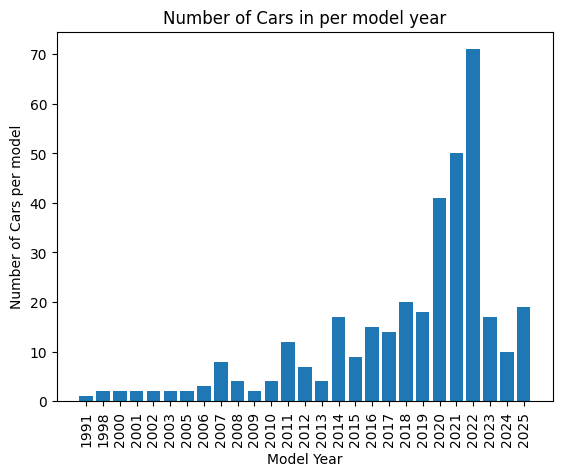

In [36]:
#Analysis 2: Number of listed availbile per modal year
analysis_2 = runDbQuery(f"SELECT [Model Year], COUNT([Model Year]) AS Cars_per_model FROM {table_name} GROUP BY [Model Year];")
analysis_2_x = analysis_2['Model Year']
analysis_2_x = analysis_2_x.astype(str)
analysis_2_y = analysis_2['Cars_per_model']
plt.bar(analysis_2_x, analysis_2_y)
plt.title('Number of Cars in per model year')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars per model')
plt.xticks(ticks=analysis_2_x, labels=analysis_2_x, rotation=90)
plt.show()

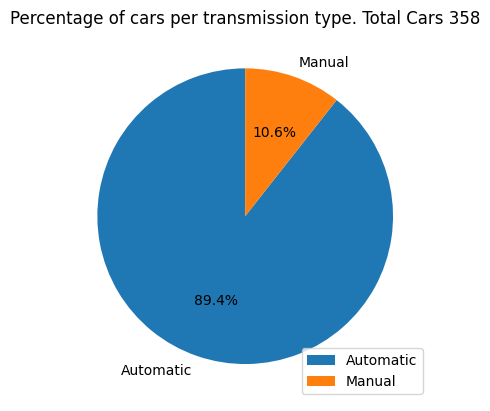

In [44]:
#Analysis 3: Percentage of cars in each transmission type
analysis_3 = runDbQuery(f"SELECT [Transmission Type], COUNT([Transmission Type]) AS Cars_per_transmission_type FROM {table_name} GROUP BY [Transmission Type];")
analysis_3_x = analysis_3['Transmission Type']
analysis_3_y = analysis_3['Cars_per_transmission_type']
total_cars = analysis_3['Cars_per_transmission_type'].sum()
plt.title(f'Percentage of cars per transmission type. Total Cars {total_cars}')
plt.pie(analysis_3_y, labels=analysis_3_x, startangle = 90, autopct='%1.1f%%')
plt.legend()
plt.show()

  Fuel Type  Cars_per_fuel_type
0    Diesel                  18
1  Electric                  10
2    Hybrid                  49
3    Petrol                 281


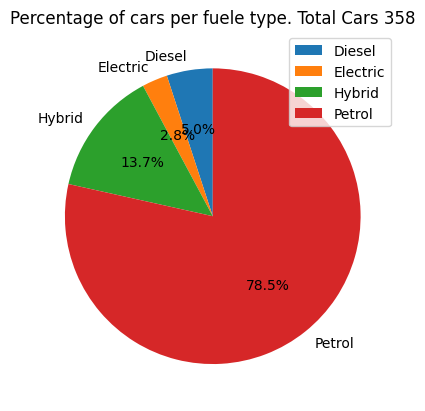

In [47]:
#Analysis 4: Number of cars availble in each engine type
analysis_4 = runDbQuery(f"SELECT [Fuel Type], COUNT([Fuel Type]) AS Cars_per_fuel_type FROM {table_name} GROUP BY [Fuel Type];")
print(analysis_4)
analysis_4_x = analysis_4['Fuel Type']
analysis_4_y = analysis_4['Cars_per_fuel_type']
total_carss = analysis_4['Cars_per_fuel_type'].sum()
plt.title(f'Percentage of cars per fuele type. Total Cars {total_carss}')
plt.pie(analysis_4_y, labels=analysis_4_x, startangle = 90, autopct='%1.1f%%')
plt.legend()
plt.show()